# Random Forest

Load in data

In [1]:
import pandas as pd
%config InlineBackend.figure_formats = ['svg']

In [2]:
df_train = pd.read_pickle("training_data_final_v3.pkl")
df_train.head()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
0,116,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
1,117,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
2,118,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
3,119,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
4,120,14.0,248.229996,3799.129883,17.01,-665.999985,-4195.700073,-0.3,-0.8,-4.3,...,False,5125.041181,5125.041181,False,False,3806.720581,True,3807.983854,True,1.0


In [3]:
df_train.shape[0]

467879

Because Random Forest does not have a built in evaluation, we can append the testing data to the training data 

In [4]:
df_test = pd.read_pickle("testing_data_final_v3.pkl")
df_test.tail()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
176190,12519,8.0,1160.579956,-4722.250000,17.010000,-2548.399963,-21971.201172,2.300000,0.100000,-0.300000,...,True,10142.190268,286.833468,False,False,-2059.354519,False,1061.406849,True,1.0
176191,12520,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10208.745254,254.911089,False,False,-2201.662082,False,1029.958910,True,1.0
176192,12521,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10275.355398,242.710862,False,False,-2257.583911,False,1074.000408,True,1.0
176193,12522,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1109.036168,True,1.0
176194,12523,8.0,1061.819946,-5045.839844,33.630001,-7788.099976,-10883.800049,4935.100098,-5320.599976,-1349.600067,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1016.637251,True,1.0


In [5]:
df_test.shape[0]

165136

In [6]:
df_train = df_train.append(df_test)
df_train.reset_index(drop = True, inplace = True)
df_train.tail()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
633010,12519,8.0,1160.579956,-4722.250000,17.010000,-2548.399963,-21971.201172,2.300000,0.100000,-0.300000,...,True,10142.190268,286.833468,False,False,-2059.354519,False,1061.406849,True,1.0
633011,12520,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10208.745254,254.911089,False,False,-2201.662082,False,1029.958910,True,1.0
633012,12521,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10275.355398,242.710862,False,False,-2257.583911,False,1074.000408,True,1.0
633013,12522,8.0,1123.630005,-4901.060059,17.010000,-5959.699707,-20948.100586,2.300000,0.200000,0.000000,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1109.036168,True,1.0
633014,12523,8.0,1061.819946,-5045.839844,33.630001,-7788.099976,-10883.800049,4935.100098,-5320.599976,-1349.600067,...,True,10325.337628,248.409190,False,False,-2390.531691,False,1016.637251,True,1.0


In [7]:
df_train.shape[0]

633015

### Build model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
X = df_train[["blue_ping", 
              "blue_pos_x", 
              "blue_pos_y", 
              "blue_pos_z", 
              "blue_vel_x", 
              "blue_vel_y", 
              "blue_vel_z", 
              "blue_ang_vel_x", 
              "blue_ang_vel_y", 
              "blue_ang_vel_z", 
              "blue_rot_x", 
              "blue_rot_y", 
              "blue_rot_z", 
              "blue_jump_active", 
              "blue_dodge_active", 
              "blue_boost", 
              "blue_possesion", 
              "blue_dist_to_ball", 
              "blue_behind_ball", 
              "blue_dead", 
              "orange_ping", 
              "orange_pos_x", 
              "orange_pos_y", 
              "orange_pos_z", 
              "orange_vel_x", 
              "orange_vel_y", 
              "orange_vel_z", 
              "orange_ang_vel_x", 
              "orange_ang_vel_y", 
              "orange_ang_vel_z", 
              "orange_rot_x", 
              "orange_rot_y", 
              "orange_rot_z", 
              "orange_jump_active", 
              "orange_dodge_active", 
              "orange_boost", 
              "orange_possesion", 
              "orange_dist_to_ball", 
              "orange_behind_ball", 
              "orange_dead", 
              "ball_pos_x", 
              "ball_pos_y", 
              "ball_pos_z", 
              "ball_vel_x", 
              "ball_vel_y", 
              "ball_vel_z", 
              "ball_ang_vel_x", 
              "ball_ang_vel_y", 
              "ball_ang_vel_z", 
              "ball_dist_to_blue_goal", 
              "ball_dist_to_orange_goal"]].copy()
X.head()

,blue_ping,blue_pos_x,blue_pos_y,blue_pos_z,blue_vel_x,blue_vel_y,blue_vel_z,blue_ang_vel_x,blue_ang_vel_y,blue_ang_vel_z,...,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,ball_ang_vel_x,ball_ang_vel_y,ball_ang_vel_z,ball_dist_to_blue_goal,ball_dist_to_orange_goal
0,11.0,-256.000000,-3839.459961,17.01,0.000000,430.000000,0.8,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
1,11.0,-256.000000,-3839.459961,17.01,0.000000,430.000000,0.8,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
2,11.0,-256.000000,-3826.379883,17.01,0.000000,2472.299957,0.0,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
3,11.0,-256.000000,-3826.379883,17.01,0.000000,2472.299957,0.0,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
4,11.0,-254.630005,-3797.439941,17.01,457.999992,4215.899963,0.1,-0.1,-3.7,-1152.5,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181


In [10]:
y = df_train["game_next_goal"].copy()
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: game_next_goal, dtype: float64

In [11]:
rf = RandomForestClassifier(random_state = 99, max_depth = 4, verbose = 3)
rf.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(max_depth=4, random_state=99, verbose=3)

### Evaluate Model

Accuracy on training data

In [12]:
rf.score(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


0.6072952457682678

Load in dataset that contains 20 games that are unseen by the model

In [13]:
df_accuracy = pd.read_pickle("accuracy_data_final_v3.pkl")

In [14]:
X_accuracy = df_accuracy[["blue_ping", 
                          "blue_pos_x", 
                          "blue_pos_y", 
                          "blue_pos_z", 
                          "blue_vel_x", 
                          "blue_vel_y", 
                          "blue_vel_z", 
                          "blue_ang_vel_x", 
                          "blue_ang_vel_y", 
                          "blue_ang_vel_z", 
                          "blue_rot_x", 
                          "blue_rot_y", 
                          "blue_rot_z", 
                          "blue_jump_active", 
                          "blue_dodge_active", 
                          "blue_boost", 
                          "blue_possesion", 
                          "blue_dist_to_ball", 
                          "blue_behind_ball", 
                          "blue_dead", 
                          "orange_ping", 
                          "orange_pos_x", 
                          "orange_pos_y", 
                          "orange_pos_z", 
                          "orange_vel_x", 
                          "orange_vel_y", 
                          "orange_vel_z", 
                          "orange_ang_vel_x", 
                          "orange_ang_vel_y", 
                          "orange_ang_vel_z", 
                          "orange_rot_x", 
                          "orange_rot_y", 
                          "orange_rot_z", 
                          "orange_jump_active", 
                          "orange_dodge_active", 
                          "orange_boost", 
                          "orange_possesion", 
                          "orange_dist_to_ball", 
                          "orange_behind_ball", 
                          "orange_dead", 
                          "ball_pos_x", 
                          "ball_pos_y", 
                          "ball_pos_z", 
                          "ball_vel_x", 
                          "ball_vel_y", 
                          "ball_vel_z", 
                          "ball_ang_vel_x", 
                          "ball_ang_vel_y", 
                          "ball_ang_vel_z", 
                          "ball_dist_to_blue_goal", 
                          "ball_dist_to_orange_goal"]].copy()
X_accuracy.head()

,blue_ping,blue_pos_x,blue_pos_y,blue_pos_z,blue_vel_x,blue_vel_y,blue_vel_z,blue_ang_vel_x,blue_ang_vel_y,blue_ang_vel_z,...,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,ball_ang_vel_x,ball_ang_vel_y,ball_ang_vel_z,ball_dist_to_blue_goal,ball_dist_to_orange_goal
0,4.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.2,0.5,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
1,4.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.2,0.5,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
2,4.0,2036.800049,-2548.800049,17.01,-1885.899963,1885.899963,0.0,0.2,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
3,4.0,2036.800049,-2548.800049,17.01,-1885.899963,1885.899963,0.0,0.2,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
4,4.0,2014.979980,-2526.979980,17.01,-3199.400024,3199.400024,0.0,0.0,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181


In [15]:
y_accuracy = df_accuracy["game_next_goal"].copy()
y_accuracy.describe()

count    164639.000000
mean          0.484199
std           0.499752
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: game_next_goal, dtype: float64

Accuracy on unseen games

In [16]:
rf.score(X_accuracy, y_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.573800861278312

Create confusion matrix

In [17]:
df_accuracy["prediction"] = rf.predict(X_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [18]:
cm = pd.crosstab(df_accuracy['game_next_goal'], df_accuracy['prediction'],
                 rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0.0,1.0
Actual,,
0.0,51028,33893
1.0,36276,43442


Logloss on unseen games

In [19]:
df_accuracy["prediction_prob"] = rf.predict_proba(X_accuracy)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [20]:
from sklearn.metrics import log_loss

In [21]:
log_loss(df_accuracy["game_next_goal"], df_accuracy["prediction_prob"])

0.6737012182548382

### Hyperparameter tuning

Round 1

In [72]:
max_depth = [3, 4, 5]

param_grid = {'max_depth': max_depth}

param_grid

{'max_depth': [3, 4, 5]}

Because of the autocorrelation, normal cross validation will lead to overfitting. Therefore, only 20 specific games will be used as cross validation, and the other 60 games will be used for training. 

In [73]:
train_indices = [i for i in range(467879)]
test_indices = [i + 467879 for i in range(165136)]
custom_cv = [(train_indices, test_indices)]

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
rf_new = RandomForestClassifier(random_state = 99, verbose = 3)

rf_GSCV = GridSearchCV(estimator = rf_new, 
                       param_grid = param_grid, 
                       cv = custom_cv, 
                       scoring = "neg_log_loss", 
                       verbose = 3)

In [76]:
rf_GSCV.fit(X, y)

Fitting 1 folds for each of 3 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


[CV 1/1] END ......................max_depth=3;, score=-0.673 total time=  54.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


[CV 1/1] END ......................max_depth=4;, score=-0.670 total time= 1.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


[CV 1/1] END ......................max_depth=5;, score=-0.667 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [467879, 467880, 467881, 467882, 467883, 467884, 467885,
                   467886, 467887, 467888, 467889, 467890, 467891, 467892,
                   467893, 467894, 467895, 467896, 467897, 467898, 467899,
                   467900, 467901, 467902, 467903, 467904, 467905, 467906,
                   467907, 467908, ...])],
             estimator=RandomForestClassifier(random_state=99, verbose=3),
             param_grid={'max_depth': [3, 4, 5]}, scoring='neg_log_loss',
             verbose=3)

In [77]:
rf_GSCV.best_params_

{'max_depth': 5}

In [78]:
df_params = pd.DataFrame(rf_GSCV.cv_results_)
df_params = df_params[["mean_fit_time", "param_max_depth", "mean_test_score", "rank_test_score"]]
df_params.sort_values("rank_test_score", inplace = True)
df_params

,mean_fit_time,param_max_depth,mean_test_score,rank_test_score
2,81.765867,5,-0.667398,1
1,70.068697,4,-0.669627,2
0,53.551886,3,-0.672684,3


Round 2

In [79]:
max_depth = [6, 8]

param_grid = {'max_depth': max_depth}

param_grid

{'max_depth': [6, 8]}

In [80]:
rf_new2 = RandomForestClassifier(random_state = 99, verbose = 3)

rf_GSCV2 = GridSearchCV(estimator = rf_new2, 
                        param_grid = param_grid, 
                        cv = custom_cv, 
                        scoring = "neg_log_loss", 
                        verbose = 3)

In [81]:
rf_GSCV2.fit(X, y)

Fitting 1 folds for each of 2 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


[CV 1/1] END ......................max_depth=6;, score=-0.664 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


[CV 1/1] END ......................max_depth=8;, score=-0.660 total time= 2.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [467879, 467880, 467881, 467882, 467883, 467884, 467885,
                   467886, 467887, 467888, 467889, 467890, 467891, 467892,
                   467893, 467894, 467895, 467896, 467897, 467898, 467899,
                   467900, 467901, 467902, 467903, 467904, 467905, 467906,
                   467907, 467908, ...])],
             estimator=RandomForestClassifier(random_state=99, verbose=3),
             param_grid={'max_depth': [6, 8]}, scoring='neg_log_loss',
             verbose=3)

In [82]:
rf_GSCV2.best_params_

{'max_depth': 8}

In [83]:
df_params2 = pd.DataFrame(rf_GSCV2.cv_results_)
df_params2 = df_params2[["mean_fit_time", "param_max_depth", "mean_test_score", "rank_test_score"]]
df_params2.sort_values("rank_test_score", inplace = True)
df_params2

,mean_fit_time,param_max_depth,mean_test_score,rank_test_score
1,119.926132,8,-0.660115,1
0,94.112826,6,-0.664228,2


Round 3

In [84]:
max_depth = [10, 12]

param_grid = {'max_depth': max_depth}

param_grid

{'max_depth': [10, 12]}

In [85]:
rf_new3 = RandomForestClassifier(random_state = 99, verbose = 3)

rf_GSCV3 = GridSearchCV(estimator = rf_new3, 
                        param_grid = param_grid, 
                        cv = custom_cv, 
                        scoring = "neg_log_loss", 
                        verbose = 3)

In [86]:
rf_GSCV3.fit(X, y)

Fitting 1 folds for each of 2 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


[CV 1/1] END .....................max_depth=10;, score=-0.655 total time= 2.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


[CV 1/1] END .....................max_depth=12;, score=-0.653 total time= 3.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.6min finished


GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [467879, 467880, 467881, 467882, 467883, 467884, 467885,
                   467886, 467887, 467888, 467889, 467890, 467891, 467892,
                   467893, 467894, 467895, 467896, 467897, 467898, 467899,
                   467900, 467901, 467902, 467903, 467904, 467905, 467906,
                   467907, 467908, ...])],
             estimator=RandomForestClassifier(random_state=99, verbose=3),
             param_grid={'max_depth': [10, 12]}, scoring='neg_log_loss',
             verbose=3)

In [87]:
rf_GSCV3.best_params_

{'max_depth': 12}

In [88]:
df_params3 = pd.DataFrame(rf_GSCV3.cv_results_)
df_params3 = df_params3[["mean_fit_time", "param_max_depth", "mean_test_score", "rank_test_score"]]
df_params3.sort_values("rank_test_score", inplace = True)
df_params3

,mean_fit_time,param_max_depth,mean_test_score,rank_test_score
1,197.342629,12,-0.652819,1
0,141.554523,10,-0.655150,2


Because of technological limitations, I am going to stop at these parameters. 

In [91]:
rf_final = RandomForestClassifier(max_depth = 12, random_state = 99, verbose = 3)
rf_final.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished


RandomForestClassifier(max_depth=12, random_state=99, verbose=3)

Accuracy on training data

In [92]:
rf_final.score(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished


0.8575578777754082

Accuracy on unseen games

In [93]:
rf_final.score(X_accuracy, y_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


0.5990864861909997

Because of the unrealistically high accuracy on the training data, it is clear that our model is overfitting. To counteract this, I will rebuild the tree with a `min_samples_leaf` parameter.

In [108]:
rf_final2 = RandomForestClassifier(max_depth = 12, random_state = 99, min_samples_leaf = 1000, verbose = 3)
rf_final2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.8min finished


RandomForestClassifier(max_depth=12, min_samples_leaf=1000, random_state=99,
                       verbose=3)

In [109]:
rf_final2.score(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


0.7053466347558904

In [110]:
rf_final2.score(X_accuracy, y_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


0.5841568522646517

`rf_final2` actually scores worse on unseen games, and therefore we will continue with the `rf_final`. 

Confusion matrix on unseen games

In [111]:
df_accuracy["prediction"] = rf_final.predict(X_accuracy)
df_accuracy["prediction"].describe()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


count    164639.000000
mean          0.453258
std           0.497812
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: prediction, dtype: float64

In [112]:
cm_accuracy = pd.crosstab(df_accuracy['game_next_goal'], df_accuracy['prediction'],
                          rownames=['Actual'], colnames=['Predicted'])
cm_accuracy

Predicted,0.0,1.0
Actual,,
0.0,54465,30456
1.0,35550,44168


Log loss on unseen games

In [113]:
df_accuracy["prediction_prob"] = rf_final.predict_proba(X_accuracy)[:, 1]
log_loss(df_accuracy["game_next_goal"], df_accuracy["prediction_prob"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


0.652054148720872

AUC on unseen games

In [114]:
from sklearn.metrics import roc_curve, auc

In [115]:
fpr, tpr, threshold = roc_curve(df_accuracy["game_next_goal"], df_accuracy["prediction"])

rf_auc = auc(fpr, tpr)
rf_auc

0.5977069155525622

Graph of ROC

In [116]:
import matplotlib.pyplot as plt

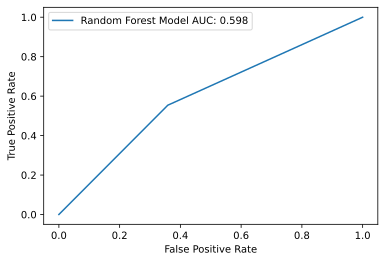

In [117]:
plt.plot(fpr, tpr, label = f"Random Forest Model AUC: {rf_auc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Save model

In [118]:
import pickle

In [119]:
pickle.dump(rf_final, open("rf_model.model", "wb"))